# Project OS

## 120 years of Olympic history: athletes and results
#### - basic bio data on athletes and medal results from Athens 1896 to Rio 2016

## Uppvärmning athlete_events data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

In [2]:
#players_os = pd.read_csv("C:/Users/Kun/Documents/GitHub/Databehandling-OS-projekt-Kun-Xiu/Data/athlete_events.csv")
players_os = pd.read_csv("../Data/athlete_events.csv")
players_os.info()
players_os.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
players_os.shape

(271116, 15)

### - a. hur många länder som är med i datan?

In [4]:
counties = players_os["NOC"].unique()
len_counties = len(players_os["NOC"].unique())
print(f"There are {len_counties} counties in the data")

There are 230 counties in the data


### - b. vilka länder är med? (förkortningarna räcker)

In [5]:
print(f"These contries are: {counties}")

These contries are: ['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VAN' 'MDA' 'YUG' 

### - c. vilka sporter är med?


In [6]:
sports = players_os["Sport"].unique()
print(f"The sports include: {sports}")

The sports include: ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


In [7]:
print(f"There are total {len(sports)} sports")

There are total 66 sports


### - d. vilka medaljtyper finns det?

In [8]:
medal_types = players_os["Medal"].unique()
print(f"The medal types are: {medal_types}")

The medal types are: [nan 'Gold' 'Bronze' 'Silver']


### - e. ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse

In [9]:
mean_age = players_os["Age"].mean().round(2) #round(2):Keep two decimal points
median_age = players_os["Age"].median()
min_age = players_os["Age"].min()
max_age = players_os["Age"].max()
std_age = players_os["Age"].std().round(2)

print(f"The mean age in the data is {mean_age}; the midian age is {median_age}; the minimum and maximum are {min_age} and {max_age}; the standard deviation is {std_age}")

The mean age in the data is 25.56; the midian age is 24.0; the minimum and maximum are 10.0 and 97.0; the standard deviation is 6.39


### - f. utforska datan vidare med egna frågor

- The average age of male and females

In [10]:
male_average = players_os["Age"][players_os["Sex"]=="M"].mean().round(2)
female_average = players_os["Age"][players_os["Sex"]=="F"].mean().round(2)
print(f"The average age of male is {male_average} and the average age of female is {female_average}.")

The average age of male is 26.28 and the average age of female is 23.73.


- How many cities hosted the Olympic Games.

In [11]:
city = players_os["City"].unique()
city_number = len(city)
print(f"There are {city_number} cities hosted olympic games in the history.")

There are 42 cities hosted olympic games in the history.


- The most Olympic gold medalists.

In [12]:
Medal = players_os["Name"][players_os["Medal"]=="Gold"]
first_Medal = Medal.value_counts().head(1)
print(f"The most Olympic gold medalists belong to {first_Medal}")


The most Olympic gold medalists belong to Michael Fred Phelps, II    23
Name: Name, dtype: int64


- The younest and oldest player won the gold in Olympic Games in the history.

In [13]:
youngest_gold = players_os["Age"][players_os["Medal"]=="Gold"].min().astype(int)
oldest_gold = players_os["Age"][players_os["Medal"]=="Gold"].max().astype(int)

print(f"The younest player won the gold is {youngest_gold} years old.")
print(f"The oldest player won the gold is {oldest_gold} years old.")

The younest player won the gold is 13 years old.
The oldest player won the gold is 64 years old.


- Messi ! Messi !!

In [14]:
messi = players_os.loc[players_os["Name"].str.contains("Lionel Andrs Messi Cuccittini")]
messi = messi[["Name","Year", "City", "Medal"]]
messi

,Name,Year,City,Medal
157451,Lionel Andrs Messi Cuccittini,2008,Beijing,Gold


In [15]:
messi_name=messi.iloc[0,0]
messi_year = messi.iloc[0,1]
messi_city = messi.iloc[0,2]
messi_medal = messi.iloc[0,3]

print(f"{messi_name} won a {messi_medal} medal at the  {messi_year} {messi_city} olympic games.")

Lionel Andrs Messi Cuccittini won a Gold medal at the  2008 Beijing olympic games.


### - g.cirkeldiagram över könsfördelningen

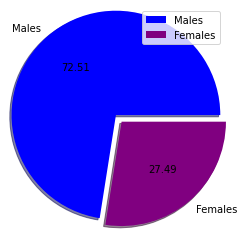

In [16]:
males = players_os["Sex"]=="M"
males = males.value_counts("True")

plt.pie(males, labels=("Males", "Females"), colors=("blue","purple"), radius=1.2, explode = (0, 0.1), autopct="%.2f", shadow=True)
plt.legend()

### - h. stapeldiagram över topp 10 länder som tagit flest medaljer


In [17]:
os_medal_event = players_os.drop_duplicates(subset=["Event", "Year", "Medal"]) #Deduplication in  this three columns 
os_medal_event
# filter the medals from events but not players
# The method ideas are from group Anna-Maria and Christopher

# For example, in 2008, the Brazilian football team won a gold medal, and only one person’s data is kept instead of
# counting as 11 people who have won 11 gold medals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270986,135508,Vera Igorevna Zvonaryova,F,23.0,172.0,59.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Tennis,Tennis Women's Singles,Bronze
271010,135521,Anton Zwerina,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver
271076,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver


[Text(0.5, 1.0, 'Top 10 countrie take the most medals')]

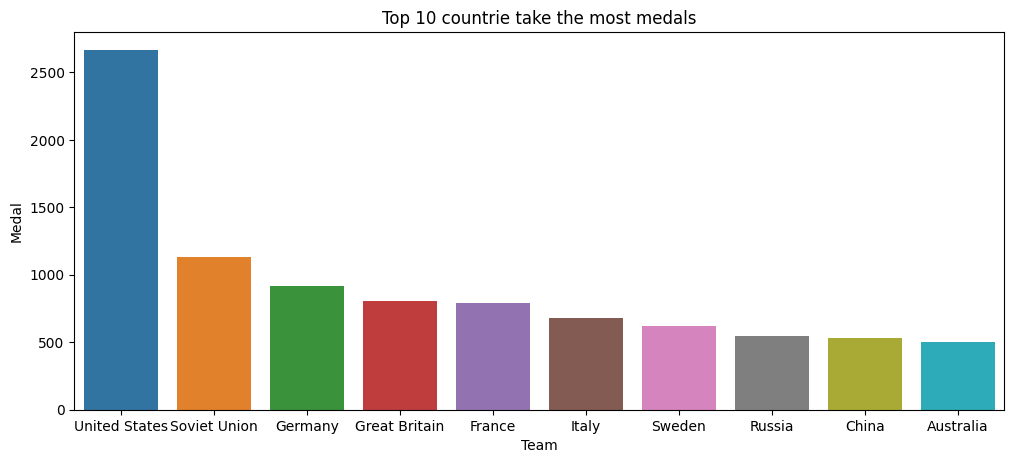

In [18]:
county_medal = os_medal_event.groupby("Team").count()
county_medal = county_medal.sort_values("Medal", ascending=False).head(10).reset_index()

fig = plt.subplots(dpi=100, figsize=(12,5))
sns.barplot(data=county_medal, x="Team", y="Medal").set(title="Top 10 countrie take the most medals")

### - i. plotta gärna fler saker som är intressant.


- 1: Cities which hosted more than 1 times Olympic games in the history

[Text(0.5, 1.0, 'Cities which hosted more than 1 times Olympic games in the history'),
 Text(0.5, 0, 'City'),
 Text(0, 0.5, 'Times')]

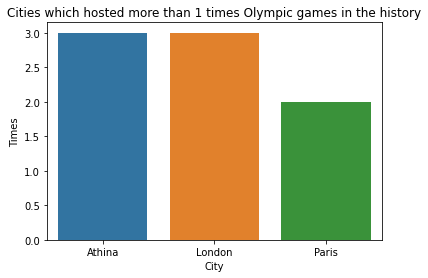

In [19]:
cities_os = players_os[["Year", "City"]]
cities_os = cities_os.drop_duplicates("Year")
cities_os = cities_os["City"].value_counts().head(3).reset_index()

sns.barplot(data=cities_os, x="index", y="City").set(title="Cities which hosted more than 1 times Olympic games in the history", xlabel="City", ylabel="Times")

- 2: Top 10 Sports which Sweden won most Olympic gold medals

In [20]:
sweden_sport_gold=os_medal_event["Sport"][os_medal_event["Team"]=="Sweden"][os_medal_event["Medal"]=="Gold"].value_counts()
sweden_sport_gold.head(10)

Cross Country Skiing    29
Wrestling               28
Athletics               20
Equestrianism           17
Shooting                15
Canoeing                15
Swimming                 9
Modern Pentathlon        9
Speed Skating            7
Diving                   6
Name: Sport, dtype: int64

In [21]:
# Python Pandas: Convert ".value_counts" output to dataframe
# reference link:https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
sweden_sport_gold=sweden_sport_gold.reset_index()
sweden_sport_gold.columns=["Sport","Counts"] # add columns name
sweden_sport_gold=sweden_sport_gold.head(10)
sweden_sport_gold

,Sport,Counts
0,Cross Country Skiing,29
1,Wrestling,28
2,Athletics,20
3,Equestrianism,17
4,Shooting,15
5,Canoeing,15
6,Swimming,9
7,Modern Pentathlon,9
8,Speed Skating,7
9,Diving,6


In [22]:
fig=px.bar(sweden_sport_gold,x="Sport",y="Counts",title=" Swden most good at Top 10 sports-win most gold medals at Olympic games")
fig.show()

- 3: Top 10 Sports which Sweden won most Olympic medals


In [23]:
medal=os_medal_event[os_medal_event["Medal"].isin(["Gold","Silver","Bronze"])]
sweden_sport_medal=medal["Sport"][medal["Team"]=="Sweden"].value_counts()
sweden_sport_medal=sweden_sport_medal.reset_index().head(10)
sweden_sport_medal


,index,Sport
0,Athletics,88
1,Wrestling,84
2,Cross Country Skiing,74
3,Shooting,59
4,Equestrianism,43
5,Swimming,38
6,Canoeing,30
7,Modern Pentathlon,21
8,Diving,21
9,Cycling,17


In [24]:
total_medal=sweden_sport_medal["Sport"].sum()
print(f"Sweden team won total {total_medal} medals at olympic history ")

Sweden team won total 475 medals at olympic history 


In [25]:
fig=px.bar(sweden_sport_medal,x="index",y="Sport",title=" Top 10 sports win most medals at Olympic games by Sweden ")
fig.show()

- 4:Distribution of medals which Sweden team won at history Olympic games VS Year

In [26]:
sweden_medal_year=medal["Year"][medal["Team"]=="Sweden"].value_counts()

sweden_medal_year=sweden_medal_year.reset_index()
sweden_medal_year=sweden_medal_year.rename(columns={"index":"Year",
                                                     "Year":"Number_of_medal"}
                                           )
sweden_medal_year=sweden_medal_year.sort_values(by="Year")                                           
#sweden_medal_year.head()    
fig=px.line(sweden_medal_year,x="Year",y="Number_of_medal",title=" Distribution of medals which Sweden team won at history Olympic games ")
fig.show()

- 5:who have participated most events at olympics history

In [27]:
players_os1=players_os.drop_duplicates(subset=["Event", "Year", "Medal"])
most_events=players_os1["Name"].value_counts()
most_events

Nikolay Yefimovich Andrianov                  24
Kjetil Andr Aamodt                            20
Janne Petteri Ahonen                          17
Rnar (Ruslan-) Alexandersson (Ovtinnikov-)    16
Paavo Johannes Aaltonen                       16
                                              ..
Ove Sren Claeson                               1
Sandie Clair                                   1
Diana Clapham                                  1
Eugene Howard "Gene" Clapp, IV                 1
Johan Fredrik Mathias Fredriksson              1
Name: Name, Length: 16931, dtype: int64

In [51]:
#Nikolay Yefimovich Andrianov  
Nikolay=players_os.loc[players_os["Name"].str.contains("Nikolay Yefimovich Andrianov")]
Nikolay=Nikolay[["Name","Team","Games","Year","City","Sport","Event","Medal"]].reset_index(drop=True)
Nikolay.head()

,Name,Team,Games,Year,City,Sport,Event,Medal
0,Nikolay Yefimovich Andrianov,Soviet Union,1972 Summer,1972,Munich,Gymnastics,Gymnastics Men's Individual All-Around,NaN
1,Nikolay Yefimovich Andrianov,Soviet Union,1972 Summer,1972,Munich,Gymnastics,Gymnastics Men's Team All-Around,Silver
2,Nikolay Yefimovich Andrianov,Soviet Union,1972 Summer,1972,Munich,Gymnastics,Gymnastics Men's Floor Exercise,Gold
3,Nikolay Yefimovich Andrianov,Soviet Union,1972 Summer,1972,Munich,Gymnastics,Gymnastics Men's Horse Vault,Bronze
4,Nikolay Yefimovich Andrianov,Soviet Union,1972 Summer,1972,Munich,Gymnastics,Gymnastics Men's Parallel Bars,NaN


In [29]:
Nikolay_medal=Nikolay[Nikolay['Medal'].isin(["Gold","Silver","Bronze"])].reset_index(drop=True)
Nikolay_medal=Nikolay_medal["Medal"].__len__()
Events=Nikolay["Event"].__len__()
print(f"Althele 'Nikolay Yefimovich Andrianov' hade participated {Events} events and won {Nikolay_medal} medals at olympics games ")

Althele 'Nikolay Yefimovich Andrianov' hade participated 24 events and won 15 medals at olympics games 


------------------------

## Uppgift 1 - Landstatistik

- Anonymization for players with hash

In [30]:
import hashlib as hl

China_team = players_os[players_os["Team"] == "China"]
# China_team.info()    Name --> object 
hash_series = China_team["Name"].apply(lambda x: hl.sha256(x.encode()).hexdigest())
China_team.insert(2, "Player name hasehed", hash_series)
China_team.head()

,ID,Name,Player name hasehed,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
1072,602,Abudoureheman,1b3608c7e8006309deaeae26a9b7461b0d92f4c26b98ad...,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN
2611,1463,Ai Linuer,f941f6fbfcf284d4a16b4e1b2513ddab5c0e48138f871e...,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN
2612,1464,Ai Yanhan,b83a05b6351ae6d539094448c89c6e68c94af8ca0635d6...,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN


- the sports that China team received the most medals vs gold

[Text(0.5, 1.0, 'Most medal sports, China'), Text(0, 0.5, 'Number of medal')]

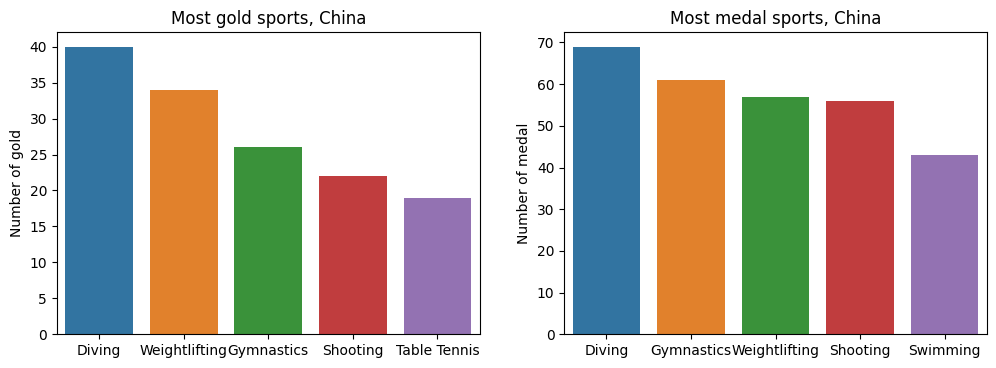

In [31]:
China_medal = China_team.drop_duplicates(subset=["Event", "Year", "Medal"]) # Filter the individual medals from group-sports

China_most_gold = pd.DataFrame(China_medal["Sport"][China_medal["Medal"] == "Gold"].value_counts().head())

China_most_medal = China_medal.dropna(subset=['Medal'])
China_most_medal = pd.DataFrame(China_most_medal.Sport.value_counts().head())

fig, ax = plt.subplots(1,2, dpi=100, figsize=(12,4))
sns.barplot(data= China_most_gold, x=China_most_gold.index, y="Sport", ax=ax[0]).set(title="Most gold sports, China", ylabel="Number of gold")
sns.barplot(data= China_most_medal, x=China_most_medal.index, y="Sport", ax=ax[1]).set(title="Most medal sports, China", ylabel="Number of medal")

- Who is the most gold earned players in China.(Top-10)

[Text(0.5, 1.0, 'Top-10 gold earned players in China')]

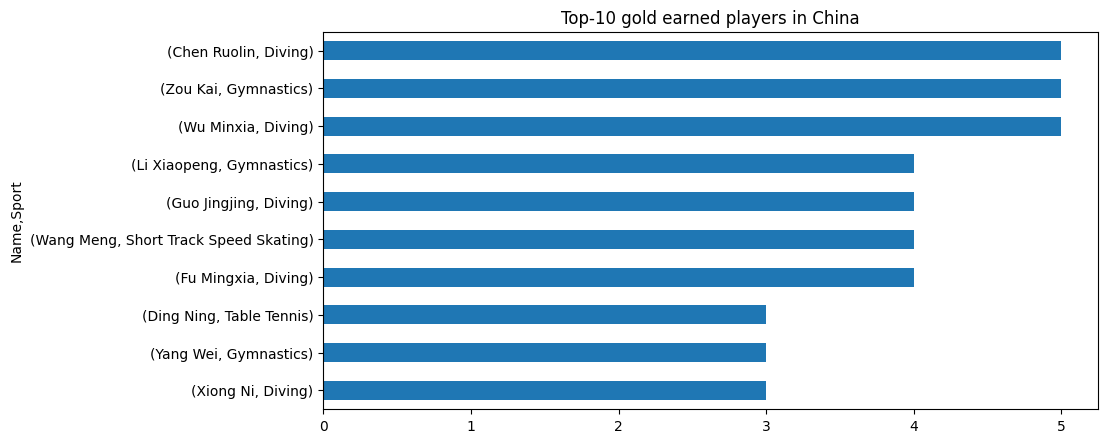

In [32]:
most_gold_China = China_team[["Name", "Sport"]][China_team["Medal"] == "Gold"].value_counts().head(10)
most_gold_China = most_gold_China.sort_values(ascending=True)

fig = plt.subplots(dpi=100, figsize=(10,5))
most_gold_China.plot.barh().set(title="Top-10 gold earned players in China")

- Hisgram of China gold medal (numbers) in Olympic games (1984 - 2016)

[Text(0.5, 1.0, 'China gold medal numbers in Olympic games'),
 Text(0, 0.5, 'Number of gold medal')]

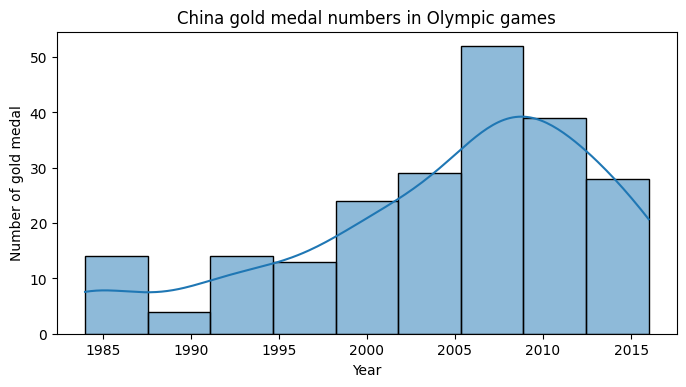

In [33]:
china_gold = os_medal_event["Year"][os_medal_event["Team"]=="China"][os_medal_event["Medal"]=="Gold"].reset_index()

fig=plt.subplots(dpi=100, figsize=(8,4))
sns.histplot(china_gold, x="Year", kde=True).set(title="China gold medal numbers in Olympic games", ylabel="Number of gold medal")

- Histgram for player's age

In [34]:
China_team.Age.describe()

count    4950.000000
mean       22.949091
std         4.097794
min        11.000000
25%        20.000000
50%        23.000000
75%        25.000000
max        45.000000
Name: Age, dtype: float64

[Text(0.5, 1.0, 'Histgram of age from China team'),
 Text(0, 0.5, 'Number of players')]

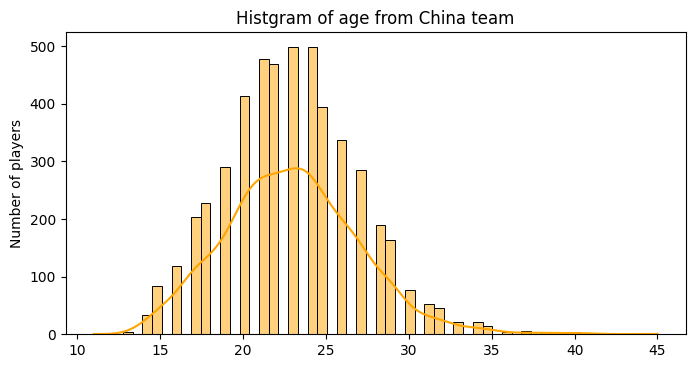

In [35]:
china_age = China_team.Age

fig=plt.subplots(dpi=100, figsize=(8,4))
sns.histplot(china_age, x=china_age.values, kde=True, color="orange").set(title="Histgram of age from China team", ylabel="Number of players")

- Number of medals for China in each OS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '1932 Summer'),
  Text(1, 0, '1936 Summer'),
  Text(2, 0, '1948 Summer'),
  Text(3, 0, '1952 Summer'),
  Text(4, 0, '1980 Winter'),
  Text(5, 0, '1984 Summer'),
  Text(6, 0, '1984 Winter'),
  Text(7, 0, '1988 Summer'),
  Text(8, 0, '1988 Winter'),
  Text(9, 0, '1992 Summer'),
  Text(10, 0, '1992 Winter'),
  Text(11, 0, '1994 Winter'),
  Text(12, 0, '1996 Summer'),
  Text(13, 0, '1998 Winter'),
  Text(14, 0, '2000 Summer'),
  Text(15, 0, '2002 Winter'),
  Text(16, 0, '2004 Summer'),
  Text(17, 0, '2006 Winter'),
  Text(18, 0, '2008 Summer'),
  Text(19, 0, '2010 Winter'),
  Text(20, 0, '2012 Summer'),
  Text(21, 0, '2014 Winter'),
  Text(22, 0, '2016 Summer')])

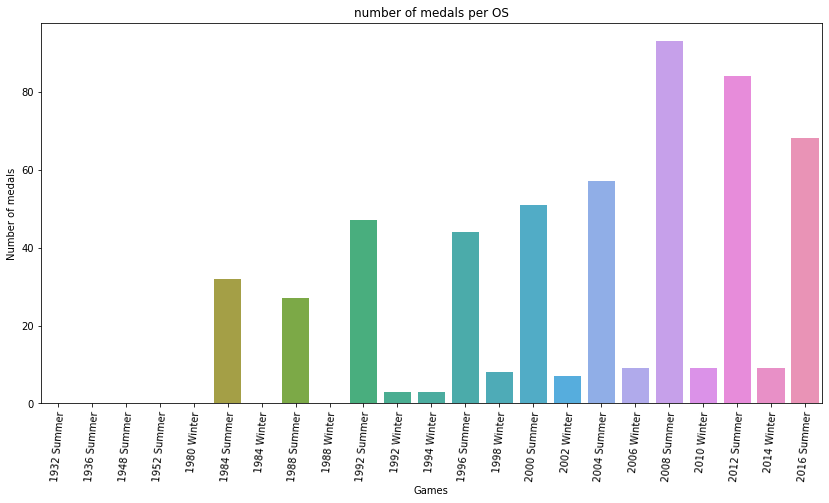

In [36]:
china_medal_year = China_medal.groupby(["Games"]).count()

fig = plt.subplots(figsize=(14, 7))
sns.barplot(data = china_medal_year, x=china_medal_year.index, y="Medal").set(title="number of medals per OS", ylabel= "Number of medals")
plt.xticks(rotation=85)

- Number of medals (Gold,Silver,Bronze) for China in each OS

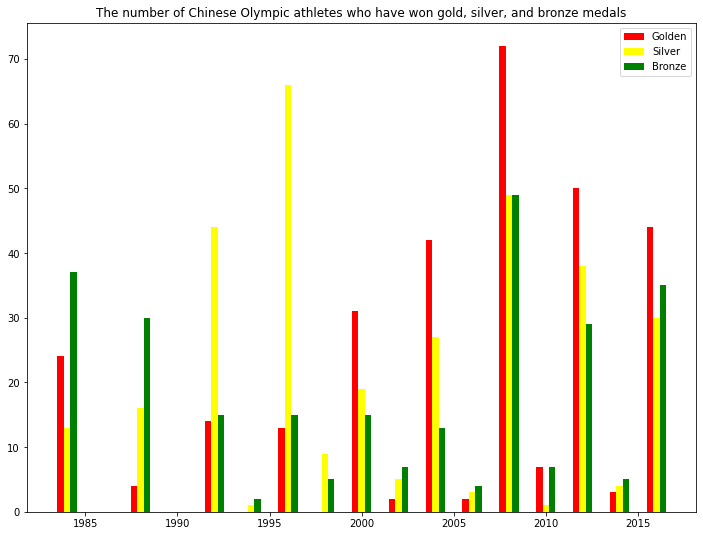

In [37]:
# Reference :https://www.cxybb.com/article/qq_43068946/108465199
china_medal = China_team.groupby('Year').Medal.value_counts().reset_index(name = "medal_counts")

x0 = china_medal[china_medal.Medal == 'Gold'].Year
x1 = china_medal[china_medal.Medal == 'Silver'].Year
x2 = china_medal[china_medal.Medal == 'Bronze'].Year
y0 = china_medal[china_medal.Medal == 'Gold'].medal_counts
y1 = china_medal[china_medal.Medal == 'Silver'].medal_counts
y2 = china_medal[china_medal.Medal == 'Bronze'].medal_counts

fig, ax = plt.subplots(figsize = (12, 9))
width = 0.35
ax.bar(x0 - width, y0, width, label = "Golden", color = 'Red')
ax.bar(x1, y1, width, label = "Silver", color = 'Yellow')
ax.bar(x2 + width, y2, width, label = "Bronze", color = 'Green') 

plt.title("The number of Chinese Olympic athletes who have won gold, silver, and bronze medals")
plt.legend()
plt.show()

-----------------------

## Uppgift 2 - Sportstatistik

### How many sports appears in olympic games history:

In [50]:
players_os.groupby(["Year","Season"]).Sport.nunique().reset_index().head()

,Year,Season,Sport
0,1896,Summer,9
1,1900,Summer,20
2,1904,Summer,18
3,1906,Summer,13
4,1908,Summer,24


[Text(0.5, 1.0, 'Olympic Games Sport Count Changing Over Years'),
 Text(0, 0.5, 'counts of sports')]

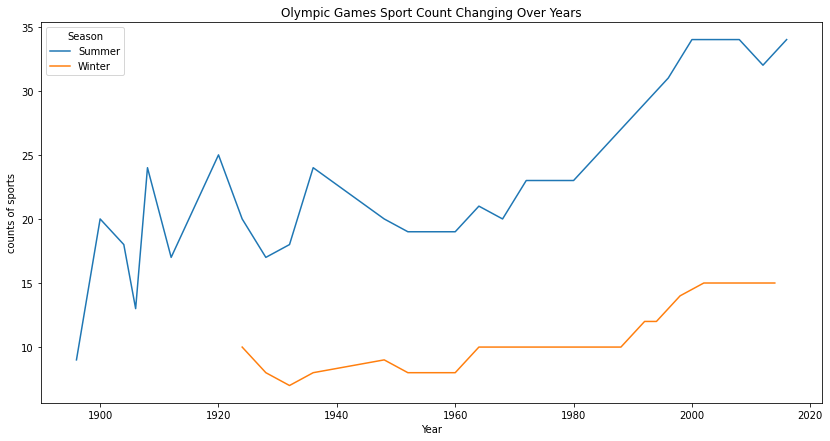

In [39]:
sport_evelution = players_os.groupby(["Year","Season"]).Sport.nunique().reset_index()

fig = plt.subplots(figsize=(14, 7))
sns.lineplot(data=sport_evelution, x="Year", y="Sport", hue="Season").set(title="Olympic Games Sport Count Changing Over Years", ylabel="counts of sports")

#### Clean and simplify the dataset

In [40]:
os_sport_medal = os_medal_event[["Sex", "NOC", "Team", "Age", "Sport", "Medal"]]
#os_sport_medal.shape
os_sport_medal = os_sport_medal.dropna() 
os_sport_medal
# cleaned the data for only contries, ages and sports with 3 kinds of medals

,Sex,NOC,Team,Age,Sport,Medal
3,M,DEN,Denmark/Sweden,34.0,Tug-Of-War,Gold
37,M,FIN,Finland,30.0,Swimming,Bronze
38,M,FIN,Finland,30.0,Swimming,Bronze
40,M,FIN,Finland,28.0,Ice Hockey,Bronze
41,M,FIN,Finland,28.0,Gymnastics,Bronze
...,...,...,...,...,...,...
270986,F,RUS,Russia,23.0,Tennis,Bronze
271010,M,AUT,Austria,23.0,Weightlifting,Silver
271076,F,URS,Soviet Union,21.0,Athletics,Gold
271078,F,URS,Soviet Union,25.0,Athletics,Silver


- Football (Men & Weman)

In [41]:
from SportFig import SportFig
#Import the class from SportFig.py

football = SportFig(os_sport_medal, "Football")

football.sport_gender()

In [42]:
football.sport_country()

In [43]:
football.sport_age()

- Swimming

In [44]:
Swimming = SportFig(os_sport_medal, "Swimming")
Swimming.sport_gender()

In [45]:
Swimming.sport_country()

In [46]:
Swimming.sport_age()

- Ice Hockey

In [47]:
Ice_Hockey = SportFig(os_sport_medal, "Ice Hockey")
Ice_Hockey.sport_gender()

In [48]:
Ice_Hockey.sport_country()

In [49]:
Ice_Hockey.sport_age()